In [1]:
from main import main

In [ ]:
main('config/arn_g_kld_kddcup99.json')

----

In [3]:
import json
import os
import sys
import numpy as np
import torch

from utils.util import load_arn_models, get_data, get_Loader, get_auc, get_auprc, show_and_save_metrics, predict

def my_import(name):
    components = name.split('.')
    mod = __import__(components[0])
    for comp in components[1:]:
        mod = getattr(mod, comp)
    return mod


def run_test(params):
    DATASET_NAME = params['DATASET_NAME']
    MODEL_NAME = params['MODEL_NAME']

    n_runs = params['n_runs']

    if 'start_runs'  in params:
        start_runs = params['start_runs']
    else:
        start_runs = 0

    seed = params['seed']

    auc_list = []
    auprc_list = []

    for i in range(start_runs, n_runs):
        print(f'Iteration: {i}')
        params['seed'] = seed*(i+1)
        dataset = get_data(params)

        train_loader, val_loader, test_loader = get_Loader(dataset, params)

        idx = params['MODEL_PATH'].rfind('.')
        mod = __import__(params['MODEL_PATH'][:idx], fromlist=params['MODEL_PATH'][idx+1:])
        Model = getattr(mod, params['MODEL_PATH'][idx+1:])

        model = Model(params)

        name_G = f'{MODEL_NAME}_Generator_{DATASET_NAME}_{i}.ckpt'
        name_D = f'{MODEL_NAME}_Discriminator_{DATASET_NAME}_{i}.ckpt'

        path_G = os.path.join(params['SPACE_MODELS'], name_G)
        path_D = os.path.join(params['SPACE_MODELS'], name_D)

        ### Evaluation ###
        load_arn_models(model.G, model.D, path_G, path_D)
        y_true, y_pred = predict(model.D, params['device'], test_loader)

        y_true = 1-y_true
        y_pred = 1-y_pred

        auc_score = get_auc(y_true, y_pred)
        auprc_score = get_auprc(y_true, y_pred)

        auc_list.append(auc_score)
        auprc_list.append(auprc_score)
    show_and_save_metrics(auc_list, auprc_list, params)

def test(fname):
    with open(fname) as fp:
        params = json.load(fp)

    np.random.seed(params['seed'])
    torch.manual_seed(params['seed'])
    torch.cuda.manual_seed(params['seed'])
    torch.use_deterministic_algorithms = True
    torch.backends.cudnn.benchmark = False

    if 'CUDA_VISIBLE_DEVICES' not in os.environ:
        os.environ['CUDA_VISIBLE_DEVICES'] = params['n_gpu']

    device = torch.device('cuda' if (torch.cuda.is_available()) else 'cpu')
    print(f'Device: {device}')

    DATASET_AREA = params['DATASET_AREA']

    FILE = params['FILE_NAME']
    params['PATH'] = os.path.join(DATASET_AREA, FILE)

    if 'FILE_NAME_2' in params:
        FILE_2 = params['FILE_NAME_2']
        params['PATH_2'] = os.path.join(DATASET_AREA, FILE_2)

    SPACE_MODELS = params['SPACE_MODELS']
    SPACE_AUC = params['SPACE_AUC']
    SPACE_AUPRC = params['SPACE_AUPRC']

    for dir in [SPACE_MODELS, SPACE_AUC, SPACE_AUPRC]:
        if not os.path.exists(dir):
            os.mkdir(dir)

    params['device'] = device
    params['seed'] = 42

    dataset = get_data(params)

    params['show'] = False
    params['nc'] = dataset['x_train'].shape[1]

    params['discreteCol'] = dataset['discreteCol']
    params['selected_columns'] = dataset['selectedColumns']
    params['index'] = dataset['index']

    run_test(params)

Device: cuda
97278 normal records, 396743 anormal records
We use 198372 anomalous records
-----------------------------------------------------------------------------------------
There are 77822 records in training set
Training set is composed by 77822 normal records and 0 abnormal records
-----------------------------------------------------------------------------------------
There are 14783 records in validation set
Validation set is composed by 4864 normal records and 9919 abnormal records
-----------------------------------------------------------------------------------------
There are 44348 records in test set
Test set is composed by 14592 normal records and 29756 abnormal records
Iteration: 0
AUC: 0.99


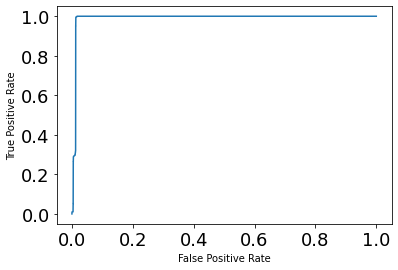

AUPRC: 0.99


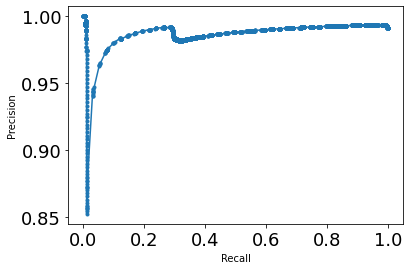

Iteration: 1
AUC: 1.00


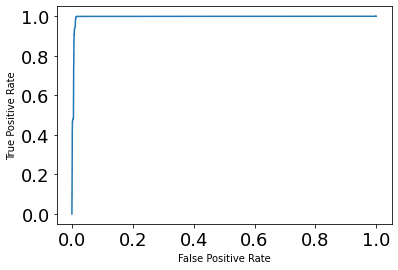

AUPRC: 1.00


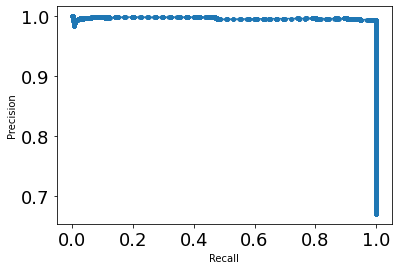

Iteration: 2
AUC: 0.92


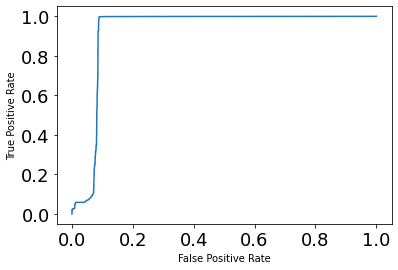

AUPRC: 0.91


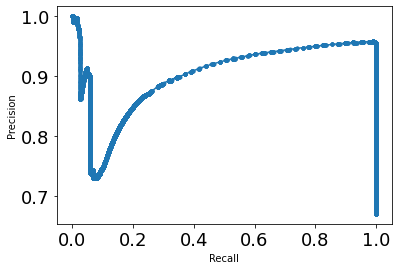

Iteration: 3
AUC: 0.98


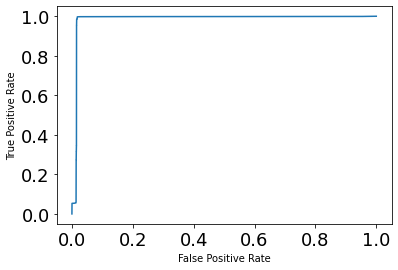

AUPRC: 0.98


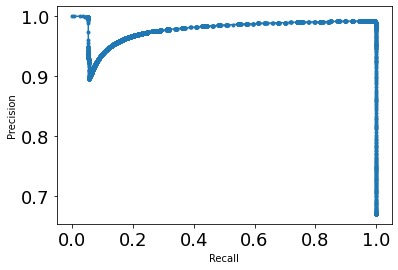

Iteration: 4
AUC: 0.92


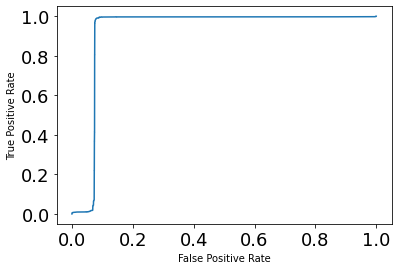

AUPRC: 0.89


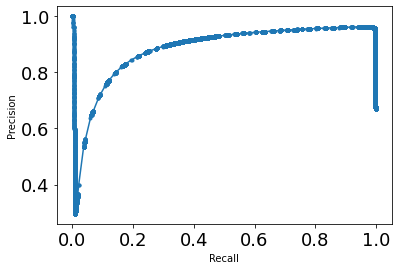

Iteration: 5
AUC: 0.99


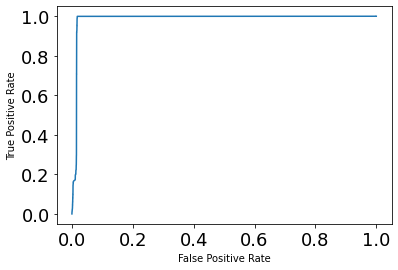

AUPRC: 0.98


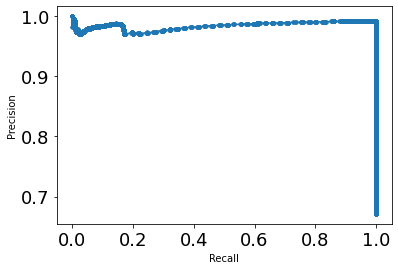

Iteration: 6
AUC: 0.99


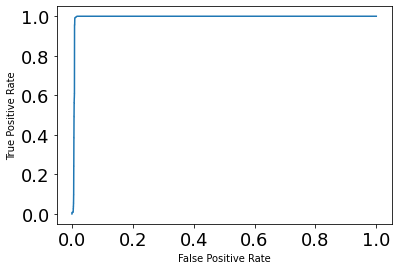

AUPRC: 0.99


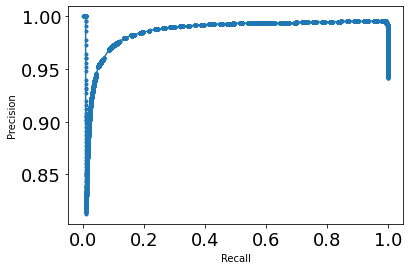

Iteration: 7
AUC: 0.98


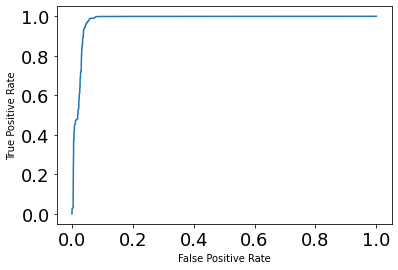

AUPRC: 0.98


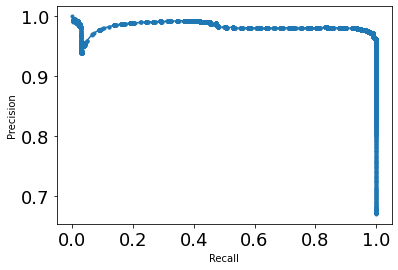

Iteration: 8
AUC: 0.99


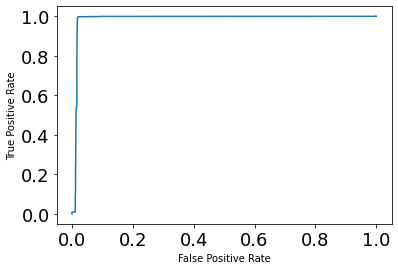

AUPRC: 0.97


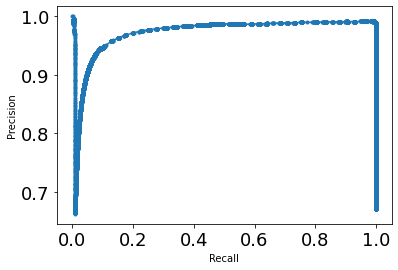

Iteration: 9
AUC: 0.99


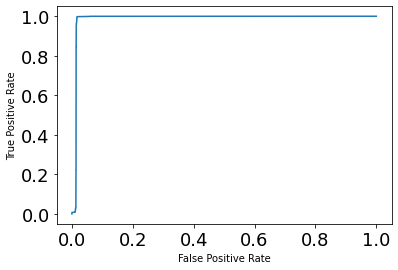

AUPRC: 0.97


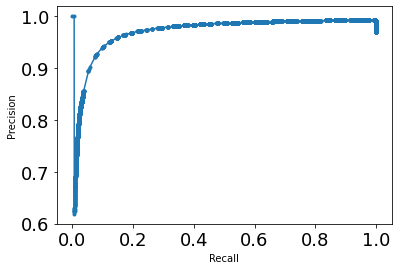

Iteration: 10
AUC: 0.87


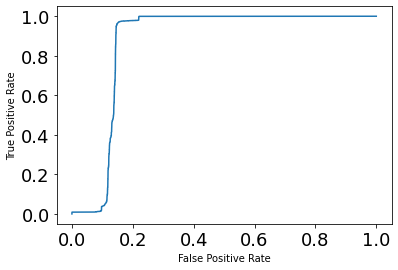

AUPRC: 0.83


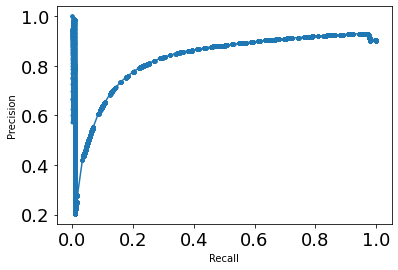

Iteration: 11
AUC: 0.99


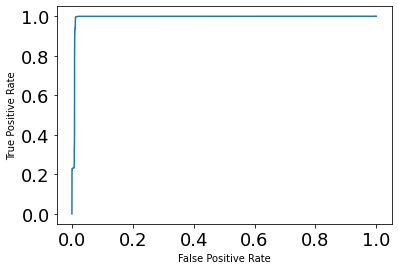

AUPRC: 0.99


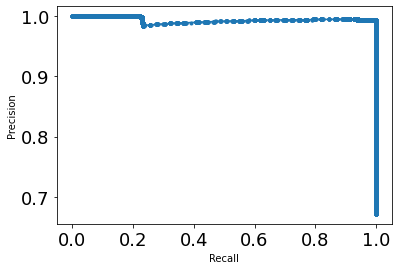

Iteration: 12
AUC: 0.99


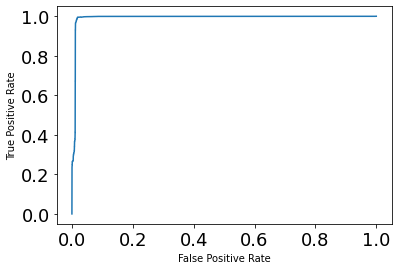

AUPRC: 0.99


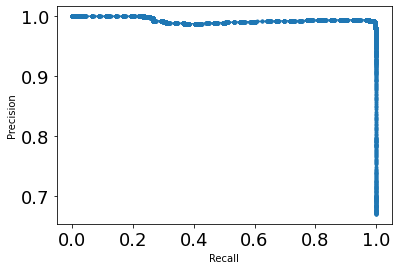

Iteration: 13
AUC: 0.93


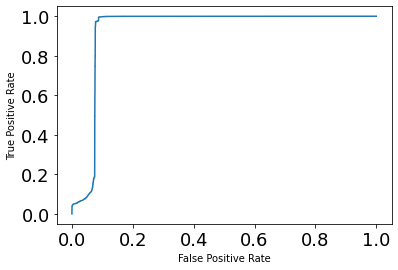

AUPRC: 0.92


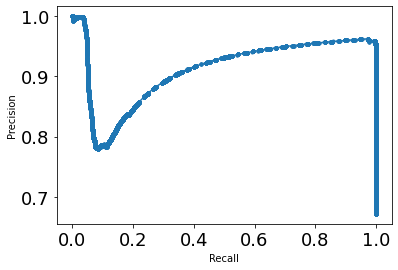

Iteration: 14
AUC: 1.00


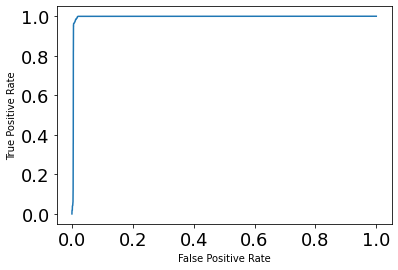

AUPRC: 0.99


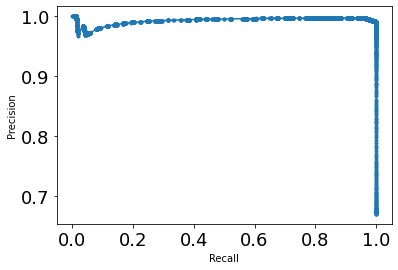

Iteration: 15
AUC: 1.00


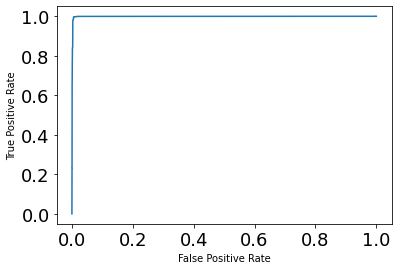

AUPRC: 1.00


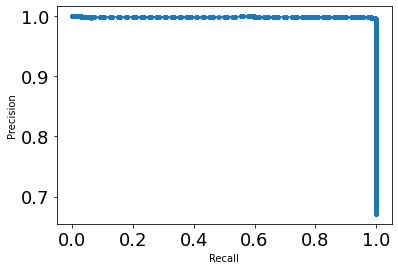

Iteration: 16
AUC: 1.00


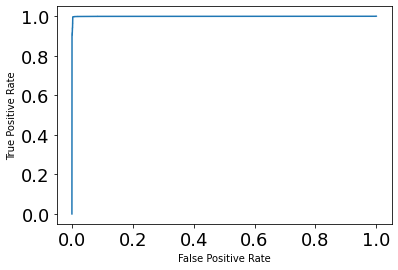

AUPRC: 1.00


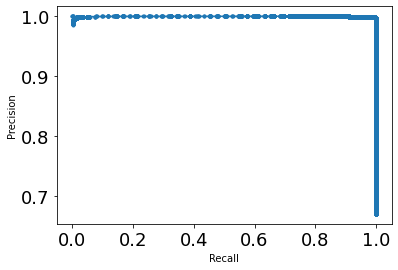

Iteration: 17
AUC: 1.00


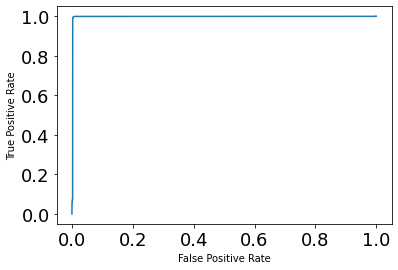

AUPRC: 1.00


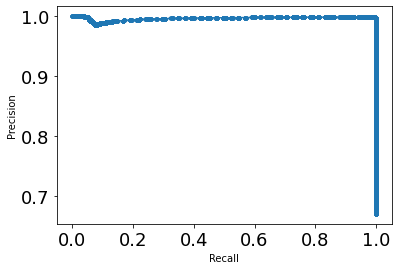

Iteration: 18
AUC: 1.00


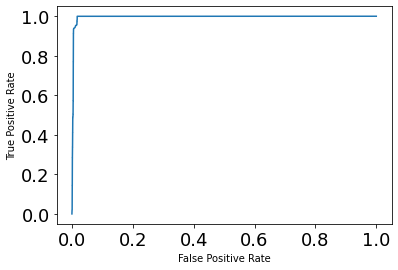

AUPRC: 1.00


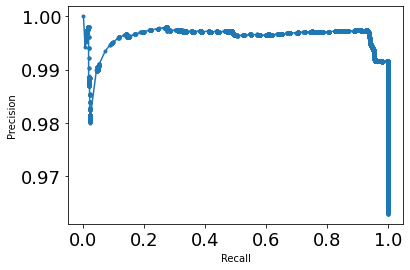

Iteration: 19
AUC: 0.99


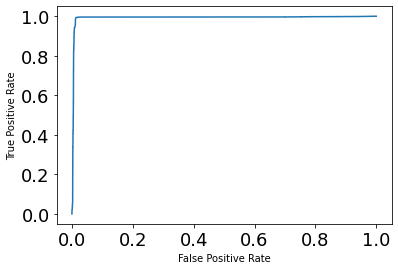

AUPRC: 0.99


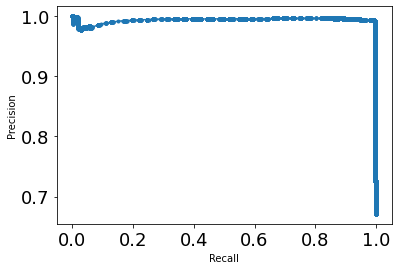

AUC:
[0.9900842147805808, 0.9956892435946134, 0.9231707820831653, 0.9844717089896952, 0.923794841916373, 0.9870183422022507, 0.9927666058485478, 0.9804443372617757, 0.9850313767712041, 0.9863749329709118, 0.8679604049890868, 0.9931011858805419, 0.9914389985367833, 0.930099178223012, 0.9952608610706258, 0.9987900989358921, 0.9991598033707783, 0.9969262934660973, 0.9963192949125844, 0.9921719322732051]
**************
AUPRC:
[0.9861499584851512, 0.9966053230076234, 0.9072588949698789, 0.9797862930419721, 0.8858287553180635, 0.9846456928607472, 0.9868318508419203, 0.9825193299241728, 0.9740637006337649, 0.9725682697920766, 0.8323185808433389, 0.993905197082291, 0.9932821465917593, 0.9167896750948605, 0.99290533463045, 0.9990549083706162, 0.9994942582618389, 0.996475753619126, 0.9961715040061743, 0.9930767102300114]
**************
AUC
0.98 +/- 0.02
95% confidence level, average auc would be between 0.96 and 0.99
**************
AUPRC
0.97 +/- 0.02
95% confidence level, average auc would be b

In [4]:
test('config/arn_g_kld_kddcup99.json')